# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading

In [23]:
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [25]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [26]:
df.skew()

,0
male,0.286135
age,0.228146
education,0.690033
currentSmoker,0.023606
cigsPerDay,1.247910
BPMeds,5.550010
prevalentStroke,12.909062
prevalentHyp,0.819278
diabetes,5.994378
totChol,0.871422


In [27]:
for i in df.columns:
  if abs(df[i].skew())<=1:
    df[i].fillna(df[i].mean(),inplace=True)
  else:
    df[i].fillna(df[i].median(),inplace=True)

In [28]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


<Axes: >

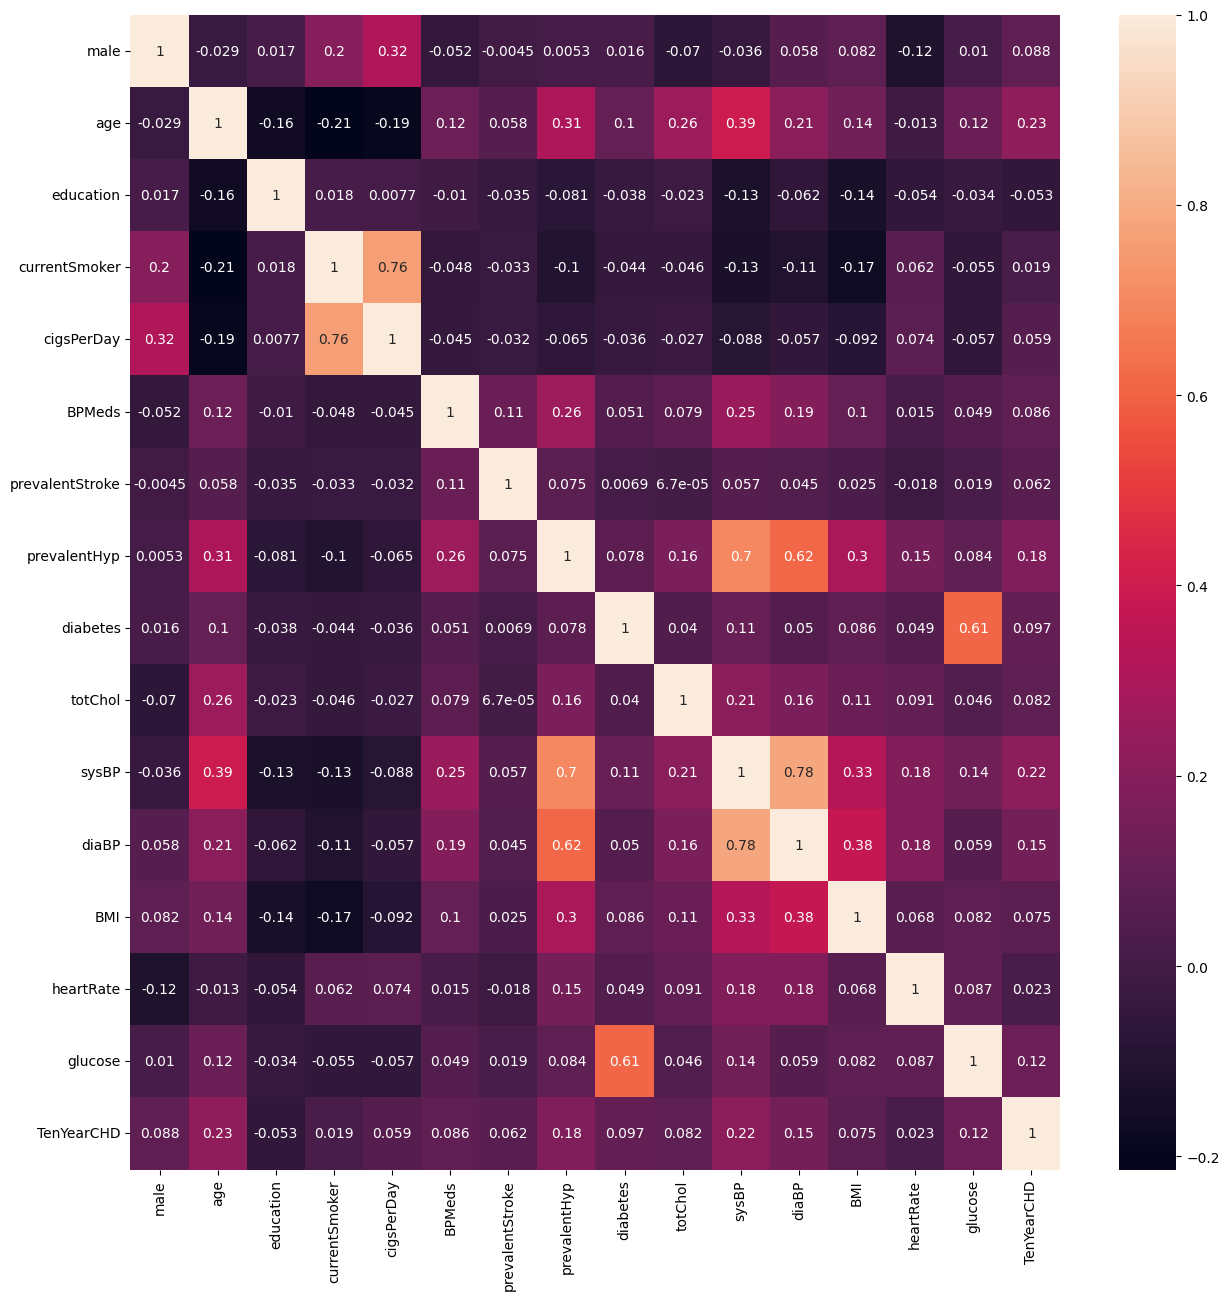

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [29]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


**The Dataset is Imbalanced**

# Model Training

In [31]:
y=df['TenYearCHD']
x=df.drop('TenYearCHD',axis=1)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [34]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
def func(x,w,b):
  return 1/(1+np.exp(-(np.dot(x,w)+b)))

In [57]:
def gradient(x,y,w,b):
  m=len(x_train)
  w_gd=np.zeros(w.shape)
  b_gd=0
  for i in range(m):
    y_pred=func(x[i],w,b)
    err=y_pred-y[i]
    w_gd+=err*x[i]
    b_gd+=err
  w_gd/=m
  b_gd/=m
  return w_gd,b_gd

In [37]:
def compute_gd(x,y,w,b,lr,iters):
  for i in range(iters):
    w_gd,b_gd=gradient(x,y,w,b)
    w-=lr*w_gd
    b-=lr*b_gd
  return w,b

In [38]:
iters=1000
lr=0.001
w=np.zeros(x_train.shape[1])
b=0
w,b=compute_gd(x_train,y_train,w,b,lr,iters)
print('weights',w)
print('bias',b)

weights [ 0.02467639  0.06814173 -0.00966389  0.00733552  0.02136998  0.02324483
  0.01748364  0.04419261  0.02303299  0.01662431  0.05753407  0.03614759
  0.01304079 -0.00046744  0.03434624]
bias -0.30702494289056326


# Testing

In [39]:
y_pred=func(x_train,w,b)
y_pred=np.where(y_pred>0.5,1,0)
score=accuracy_score(y_train,y_pred)
cm=confusion_matrix(y_train,y_pred)
print('accuracy',score)
print(cm)
print(classification_report(y_train,y_pred))

accuracy 0.8383480825958702
[[2738  132]
 [ 416  104]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2870
           1       0.44      0.20      0.28       520

    accuracy                           0.84      3390
   macro avg       0.65      0.58      0.59      3390
weighted avg       0.80      0.84      0.81      3390



In [40]:
y_pred=func(x_test,w,b)
y_pred=np.where(y_pred>=0.5,1,0)
accuracy_score(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('accuracy',score)
print(cm)
print(classification_report(y_test,y_pred))

accuracy 0.8443396226415094
[[692  32]
 [100  24]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       724
           1       0.43      0.19      0.27       124

    accuracy                           0.84       848
   macro avg       0.65      0.57      0.59       848
weighted avg       0.81      0.84      0.82       848



# Direct Method(Used GridSearchCV to choose best parameters(Tuning))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': [{0: y, 1:w} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear','saga']
}
logistic = LogisticRegression(random_state=42)
grid = GridSearchCV(logistic, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validated score:", grid.best_score_)


Best parameters: {'C': 0.001, 'class_weight': {0: 50, 1: 50}, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated score: 0.8533923303834807


In [42]:
y_pred=grid.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [43]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('accuracy',score)
print(cm)
print(classification_report(y_test,y_pred))

accuracy 0.8584905660377359
[[719   5]
 [115   9]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.64      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.75      0.53      0.53       848
weighted avg       0.83      0.86      0.81       848



# By using SMOTE for Upsampling
**the accuracy has decreased drastically.**

In [58]:
from imblearn.over_sampling import SMOTE

df_majority = df[df['TenYearCHD'] == 0]
df_minority = df[df['TenYearCHD'] == 1]
smote = SMOTE(random_state=42)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
X_resampled, y_resampled = smote.fit_resample(X, y)
df_re = pd.concat([X_resampled, y_resampled], axis=1)
df_re['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,3594


In [59]:
y_re=df_re['TenYearCHD']
x_re=df_re.drop('TenYearCHD',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=42)
y_train=np.array(y_train)
y_test=np.array(y_test)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [69]:
iters=1000
lr=0.05
w=np.zeros(x_train.shape[1])
b=0
w_re,b_re=compute_gd(x_train,y_train,w,b,lr,iters)
print('weights',w_re)
print('bias',b_re)

weights [-0.18964467  0.56225682 -0.03952557 -0.42096855  0.74130132  0.1173368
 -0.06533398 -0.30156212 -0.12706627  0.01825749  0.42051596  0.16349663
 -0.00079116 -0.0723766   0.31477299]
bias 0.041592414461493234


In [70]:
len(w),x_test.shape,x_re.shape,y_re.shape

(15, (1438, 15), (7188, 15), (7188,))

In [71]:
y_pred=func(x_test,w_re,b_re)
y_pred=np.where(y_pred>=0.5,1,0)
accuracy_score(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('accuracy',score)
print(cm)
print(classification_report(y_test,y_pred))

accuracy 0.6815020862308763
[[491 261]
 [197 489]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       752
           1       0.65      0.71      0.68       686

    accuracy                           0.68      1438
   macro avg       0.68      0.68      0.68      1438
weighted avg       0.68      0.68      0.68      1438

